# Выпускной проект. Анализ оттока клиентов

## Содержание

* [Введение](#Introduction)
    * [Задача проекта](#Project_task)
    * [Вводные данные для проведения исследования](#Input_data)
    * [Порядок действий](#Procedure)
* [Шаг 1. Подготовка данных.](#General_information)
    * [Основная информация](#Basic_information)
    * [Предобработка данных](#Data_preprocessing)
* [Шаг 2. Исследовательский анализ.](#Exploratory_analysis)
    * [Ключевые метрики данных](#Key_metrics)
    * [Анализ кореляции](#Correlation_analysis)
    * [Портрет клиентов, склонных к оттоку](Client_profile)
* [Шаг 3. Статический анализ.](#Static_analysis)
* [Шаг 4. Построение сегментов и извлечение признаков оттоков](#Segmentation_calculation)
    * [Различия дохода между теми клиентами, которые ушли и теми, которые остались](#Hypothesis_one)
    * [Различия возраста между теми клиентами, которые ушли и темы, которые остались](#Hypothesis_two)
* [Шаг 5. Выводы и рекомендации по исследованию](#Total)

## Введение
<a id='Introduction'></a>
Текст введения. [Вернуться к началу](#Содержание)

### Задача проекта
<a id='Project_task'></a>
Текст введения. [Вернуться к началу](#Содержание)

К нам обратился `отдел маркетинга` со следующим запросом:
- Максимально эффективно выделить сегменты отточных клиентов, чтобы они были однородными, высокоотточными и покрывали максимум проблемных зон банка. Таким образом, маркетинговое воздействие на эти сегменты должно привести к уменьшению.

Данную информацию необходимо предоставить `менеджеру`, который занимается маркетинговыми кампаниями и работает в тесной связкой с менеджерами продуктов.

Потребность в проведении данного исследования возникла, так как в банке "Метанпром" последнее время драматически повысился отток клиентов, что начинает становиться проблемой, которая угрожает существованию банка. 

Из общения с менеджером мы получили информацию, что раньше проводилось аналогичное исследование и по нему был составлен дашборд, но он устарел и по нему сейчас не ясно, в чём сейчас заключается проблема и как её можно решать. С момента предыдущего исследования и оформления автоматизации состав клиентов банка изменился и старые сегменты больше не подходят.

### Вводные данные для проведения исследования
<a id='Input_data'></a>
Текст введения. [Вернуться к началу](#Содержание)

От Заказчика мы получили данные, которые размещены в следующем файле `/datsets/bank_scrooge.csv`. Данный файл содержит данные о клиентах банках `"Метанпром"` со следующим атрибутивным составом:
- `userid` — идентификатор клиента;
- `score` — баллы кредитного скоринга;
- `City` — город. Как нам известно банк распологается в `Ярославле` и областных городах: `Ростов Великий` и `Рыбинск`;
- `Gender` — пол клиента;
- `Age` — возраст клиента;
- `Objects` — количество объектов в собственности 
/ `equity`  — количество баллов собственности;
- `Balance` — баланс на счёте пользователя;
- `Products` — количество продуктов, которыми пользуется клиент;
- `CreditCard` — есть ли кредитная карта у клиента;
- `Loyalty` / `last_activity` — активный ли клиент;
- `estimated_salary` — заработная плата клиента;
- `Churn` — ушёл ли клиент или нет.

### Порядок действий
<a id='Procedure'></a>
Текст введения. [Вернуться к началу](#Содержание)

Для проведения корректного исследования и предоставить информативные выводы предлагаю придерживаться следующего порядка действий:
- <b>Шаг 1 - Подготовка данных:</b>
  - изучить полученный файл;
  - выполнить подготовку данных для последующего изучения;
- <b>Шаг 2 - Исследовательский анализ:</b>
  - изучим ключевые метрики;
    - посмотрим на клиентов в разрезе категориальных переменных;
    - изучим количественные переменные;
    - изучим метрики в разрезе количества продуктов у клиентов;
  - проведем корреляционный анализ;
  - составим основной портрет пользователей, которые попадают в отток.        
- <b>Шаг 3 - Проведем статический анализ:</b>
  - проверим гипотезу "различия дохода между теми клиентами, которые ушли и теми, которые остались";
  - проверим гипотезу "различия возраста между теми клиентами, которые ушли и темы, которые остались".
- <b>Шаг 4 - Построение сегментов и извлечение признаков оттоков:</b>
  - проведем анализ признаков, которые влияют на отток клиентов;
  - получим значения или интервалы признаков, которые влияют на отток;
  - выделим сегменты клиентов опасные для оттоков клиента.       
- <b>Шаг 5 - Сформирулируем основные выводы и рекомендации по исследованию</b> 

In [1]:
#выполним загрузку необходимых библиотек для выполнения работы
import os
from scipy import stats as st
import pandas as pd
import datetime as dt
import numpy as np
import math as mth
import scipy.stats as stats
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from phik import phik_from_array
from scipy.stats import mannwhitneyu
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#увеличем максимальное количество, отображающихся колонок
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

#увеличим шириниу колонок
pd.set_option('display.max_colwidth', 0)

from IPython.core.display import display, HTML

## Шаг 1. Подготовка данных
<a id='General_information'></a>
Текст введения. [Вернуться к началу](#Содержание)

### Основная информация
<a id='Basic_information'></a>
Текст введения. [Вернуться к началу](#Содержание)

In [2]:
#откроем полученные данные и запишем в переменную
try:
    customers = pd.read_csv('bank_scrooge.csv')
except:
    customers = pd.read_csv('/datasets/bank_scrooge.csv')

In [3]:
#выведим head и tail полученного датасета
customers

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0


In [4]:
#выведим общую информацию по датасету
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Перед предобработкой данных предлагаю проверить наличие явных дубликатов в датасете.

In [5]:
print('В датасете количество явных дубликатов ->', customers.duplicated().sum())

В датасете количество явных дубликатов -> 0


Также в представленном нам датасете в колонках `age` и `balance` наблюдаются пропуски. Предлагаю посмотреть их количество и долю от общего числа записей. 

In [6]:
print('В колонке "age" пропусков: ', customers['age'].isnull().sum(), '. Это - ', customers['age'].isnull().mean() * 100, '% от общего числа записей')

В колонке "age" пропусков:  26 . Это -  0.26 % от общего числа записей


In [7]:
print('В колонке "balance" пропусков: ', customers['balance'].isnull().sum(), '. Это - ', customers['balance'].isnull().mean() * 100, '% от общего числа записей')

В колонке "balance" пропусков:  2295 . Это -  22.95 % от общего числа записей


<b>Подитог:</b>

По полученному датасету мы видим следующую картину:
- в датасете представлено 10000 позиций по Москве;
- в нашем распоряжении следующие данные:
    - тип объекта `object`:
        - `city` - город расположение банка;
    - тип объекта `float64`:
        - `score` - баллы кредитного скоринга;
        - `age` - возраст клиента;
        - `balance` - баланс счета клиента;
        - `est_salary` - заработная плата клиента;
    - тип объекта `int64`:
        - `userid` - уникальный идентификатор клиента;
        - `equity` - количество баллов собственности;
        - `products` - количество продуктов, которым пользуется/пользовался клиент;
        - `credit_card` - признак есть ли кредитная карта у клиента;
        - `last_activity` - признак активен ли клиент или нет;
        - `churn` - признак ушел ли клиент или нет.
- наименование колонок необходимо привести к питонообразному виду;
- в колонке `balance` имеется большое кол-во пропуском. Данный пропуски можно объяснить тем, что в среди предоставленных строк имеются клиенты, у которых может быть нулевой баланс. Нулевым баланс может быть в нескольких случаях:
    - клиент перевел все деньги со своего счета;
    - счет или кредитная карта закрывается, для корректного закрытия необходимо перевести баланс в нулевой;
- в последующей предобработке нам необходимо выполнить следующие действия:
    - наименованование колонок привести к питонообразном виду;
    - привести колонки `credit_card`, `last_activity`, `churn` к типу `boolean` для корректного анализа данных;
    - привести колонку `age` к типу `int64`;
    - заменить пустые значения в колонке `balance`.

### Предобработка данных
<a id='Data_preprocessing'></a>
Текст введения. [Вернуться к началу](#Содержание)

In [8]:
#приведем наименование колонок к питонообразному виду
customers.columns = customers.columns.str.lower()

In [9]:
#приводим колонки `credit_card`, `last_activity`, `churn` к типу `boolean` 
#customers['credit_card'] = customers['credit_card'].astype('boolean')
#customers['last_activity'] = customers['last_activity'].astype('boolean')
#customers['churn'] = customers['churn'].astype('boolean')

В колонке `age` присутствуют пропуски, количество пропусков составляет 0,26%. Данный процент небольшой, по этому предлагаю их удалить из таблицы.

In [10]:
#удаляем строки с пустыми значениями в колонке `age`
customers = customers.dropna(subset = 'age')

In [11]:
#приведем колонку `age` к типу `int64`
customers['age'] = customers['age'].astype('int')

В колонке `balance` присутствуют пропуски, количество пропусков составляет 22,95%. Данный проццент слишком большой, необходимо посмотреть с чем могут быть связаны пропуски, также их заполнить значением "0".

interval columns not set, guessing: ['balance', 'churn', 'products', 'last_activity', 'credit_card']


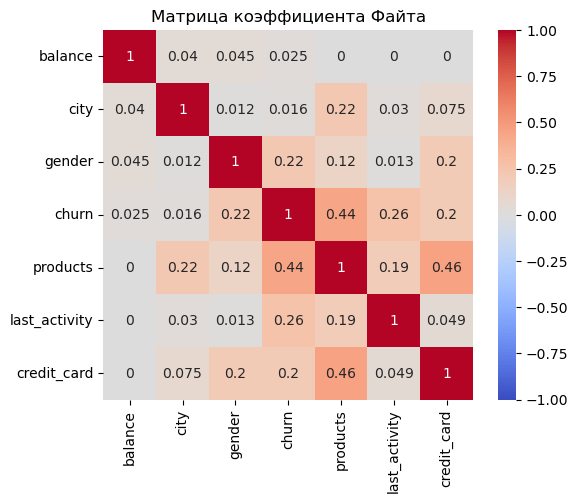

In [12]:
columns = ['balance', 'city', 'gender', 'churn', 'products', 'last_activity', 'credit_card']
customers_phic = customers[columns]
phik_overview = customers_phic.phik_matrix().round(3)

sns.heatmap(phik_overview, cmap='coolwarm', annot=True,
            vmin=-1, vmax=1, center=0, square=True)

# add title and axis labels
plt.title("Матрица коэффициента Файта")

# show plot
plt.show();

Баланс клиентов больше всего коррелирует с полом клиента и ушел ли клиент из банка или нет. Также коррелляция наблюдается и с городом расположения банка.
Изучим подробно по каждой категории пропуски по балансу.

In [13]:
#напишем функию для изучения категорий
def calc_ratio(customers, col_name):
    group_cat = customers.groupby(col_name)['age'].count()
    zero_bal_ratio = customers.query("balance == 0").groupby(col_name)['balance'].count() / group_cat
    return zero_bal_ratio

In [14]:
#характер пропусков баланса по городам
city_ratio = calc_ratio(customers, 'city')
city_ratio

city
Ростов      NaN     
Рыбинск     NaN     
Ярославль    0.00034
dtype: float64

In [15]:
#характер пропусков баланса по полу клиента
gender_ratio = calc_ratio(customers, 'gender')
gender_ratio

gender
Ж   NaN      
М    0.000401
dtype: float64

In [16]:
#характер пропусков баланса по признаку уходит клиент или нет
churn_ratio = calc_ratio(customers, 'churn')
churn_ratio

churn
0    0.000245
1   NaN      
dtype: float64

<b>Подитог:</b> Пропуски в колонке `balance` зависят от других предоставленных данных. Если мы выполним отброс строк с нулевым балансом, тем самым мы исказим последующий анализ. Предлагаю из заменить на "0".

In [17]:
#заменим пропущенные значения колонки 'balance' на '0'
customers = customers.fillna(0)

In [18]:
customers['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

In [19]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9974 non-null   int64  
 1   score          9974 non-null   float64
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   int32  
 5   equity         9974 non-null   int64  
 6   balance        9974 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
dtypes: float64(3), int32(1), int64(6), object(2)
memory usage: 974.0+ KB


<b>Итог:</b>

Сначала подведем подитог по характеру пропусков по колонке `balance`:
- если смотрим по городам наибольшее количество пропусков приходится на Ростов;
- также нулевой баланс приходится на клиентов женского пола, а также для клиентов, которые уходят из банка.

В таблице была выполнена предобработка:
- наименование колонок приведены к питонообразному виду;
- заполнены пропуски в колонке `balance` на ноль;
- удалены строки с пропусками по колонке `age`, так как их количество составляет всего 0,26%;
- заменены значения на `boolean` в колонка `credit_card`, `last_activity`, `churn`;
- колонка `age` заменена на тип `int`.

## Шаг 2. Исследовательский анализ
<a id='
Explorator_aAnalysis'></a>
Текст введения. [Вернуться к началу](#Содержание)

### Ключевые метрики данных
<a id='Kke_ metrics'></a>
Текст введения. [Вернуться к началу](#Содержание)

Так как колонка `user_id` в данном анализе не несет никакой смысловой нагрузки для наз, предлагаю из предоставленного датасете ее убрать.

In [20]:
customers = customers.drop('userid', axis=1)

In [21]:
#определим параметры формата вывода значений
pd.set_option('display.float_format', '{:.2f}'.format)

In [22]:
#изучим ключевые метрики в предоставленных данных
customers.describe().round(2)

,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,9974.00,9974.00,9974.00,9974.00,9974.00,9974.00,9974.00,9974.00,9974.00
mean,848.68,42.73,2.63,638224.86,1.87,0.68,0.52,147786.81,0.18
std,65.40,12.18,1.98,1773745.23,0.79,0.47,0.50,139285.51,0.39
min,642.00,18.00,0.00,0.00,0.00,0.00,0.00,2546.30,0.00
25%,802.00,33.00,0.00,62803.20,1.00,0.00,0.00,75251.66,0.00
50%,853.00,40.00,3.00,376253.62,2.00,1.00,1.00,119626.80,0.00
75%,900.00,51.00,4.00,804256.28,2.00,1.00,1.00,174499.81,0.00
max,1000.00,86.00,9.00,119113552.01,5.00,1.00,1.00,1395064.45,1.00


<b>Подитог:</b>
- кредитный рейтинг варируется от 802 до 900 баллов. Минимальное значение кредитного рейтинга 642 балла. Такие показатели говорят, что клиентская база у банка очень хорошая. Такой вывод можно сделать в соответствии с градацией кредитного рейтинга из открытых источников:
    - `1 – 710 баллов`: очень низкий, получить кредит практически невозможно.
    - `711 – 808 баллов`: средний, получить деньги будет непросто.
    - `809 – 890 баллов`: хороший, получить заем будет легко.
    - `891 – 999 баллов`: очень хороший, банки выстраиваются в очередь со своими предложениями.
- возраст клиентов в предоставленном датасете в основном находится от 33 до 51 года;
- баланс клиентов варируется от 62803,8 до 804256,3. Требуется просмотреть баланс более подробно, много ли выбросов;
- у клиентов в основном количество продуктов открытых в банке в основном равно 2. Можно  предположить, что у клиента в основном открыта дебетовая карта и кредитная карта.

Предлагаю далее построить графики распределения для категориальных величин:
- город;
- пол;
- наличие кредитной карты;
- уходит ли клиент из банка или нет;
- продукты;
- активен ли клиент или нет.

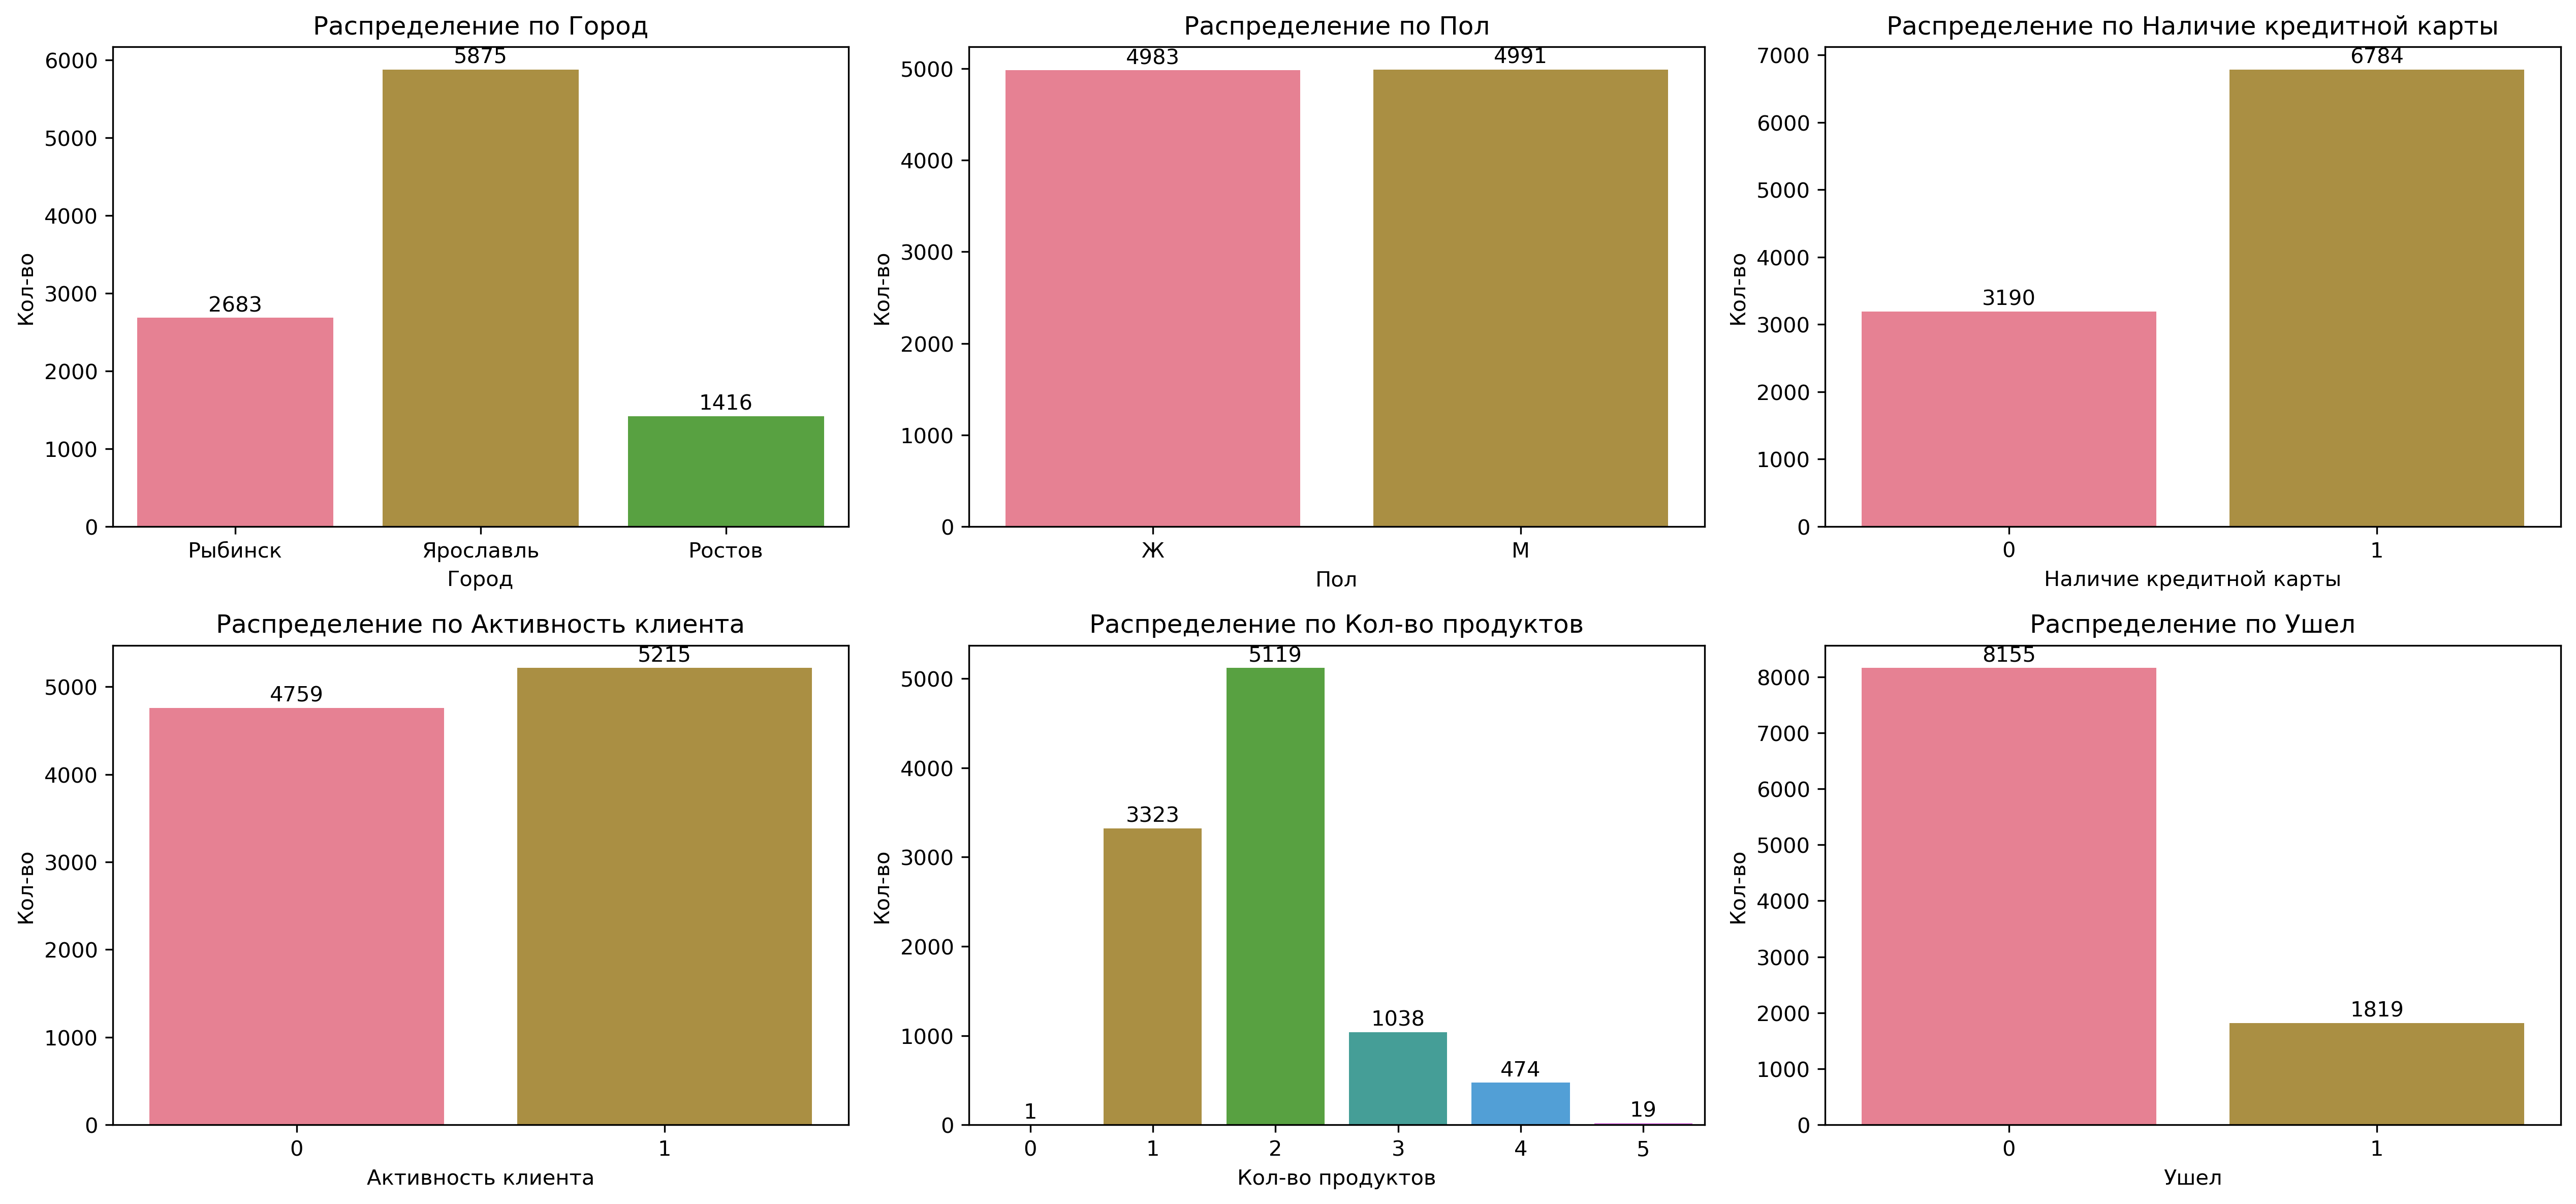

In [23]:
column_names = {
    'city': 'Город', 
    'gender': 'Пол', 
    'credit_card': 'Наличие кредитной карты', 
    'last_activity': 'Активность клиента',
    'products': 'Кол-во продуктов', 
    'churn': 'Ушел'
}

sns.set_palette("husl")
fig, ax = plt.subplots(2, 3, figsize=(17, 8), dpi=300)

for i, column in enumerate(column_names):
    row = i // 3
    col = i % 3
    sns.countplot(x=column, data=customers, ax=ax[row, col])
    ax[row, col].set_title("Распределение по {}".format(column_names[column]))
    ax[row, col].set_xlabel(column_names[column])
    ax[row, col].set_ylabel("Кол-во")
    
    for p in ax[row,col].patches:
            height = p.get_height()
            ax[row,col].annotate('{:.0f}'.format(height), xy=(p.get_x() + p.get_width() / 2, height),
                        xytext=(0, 1), textcoords='offset points', ha='center', va='bottom')

plt.tight_layout()
plt.show()

<b>Подитог:</b>

- Наибольшее колиечство клиентов являются клиентами в городе Ярославль (5875 клиентов);
- По полу сильных различий нет между клиентами - Женщин (4953), Мужчин (4991);
- Среди предоставленных данных клиентов с кредитными картами в <b>два раза</b> больше - 6784 клиента;
- Активных клиентов больше, чем бездействующих - 5215 клиентов;
- Наибольшее количество клиентов с двумя продуктами - 5119 клиентов, очень близку к значению к клиентам с кредитными картами, то есть можно предположить что у клиента в банке открыта дебетовый и кредитный счета;
- Из представленных данных уходящих / ушедших пользователей составляет 1819 клиентов - показатель очень большой.

Предлагаю посмотреть графики распределения по количественным величинам:
- количество кредитных баллов;
- возраст клиентов;
- баланс клиентов;
- заработная плата клиента.

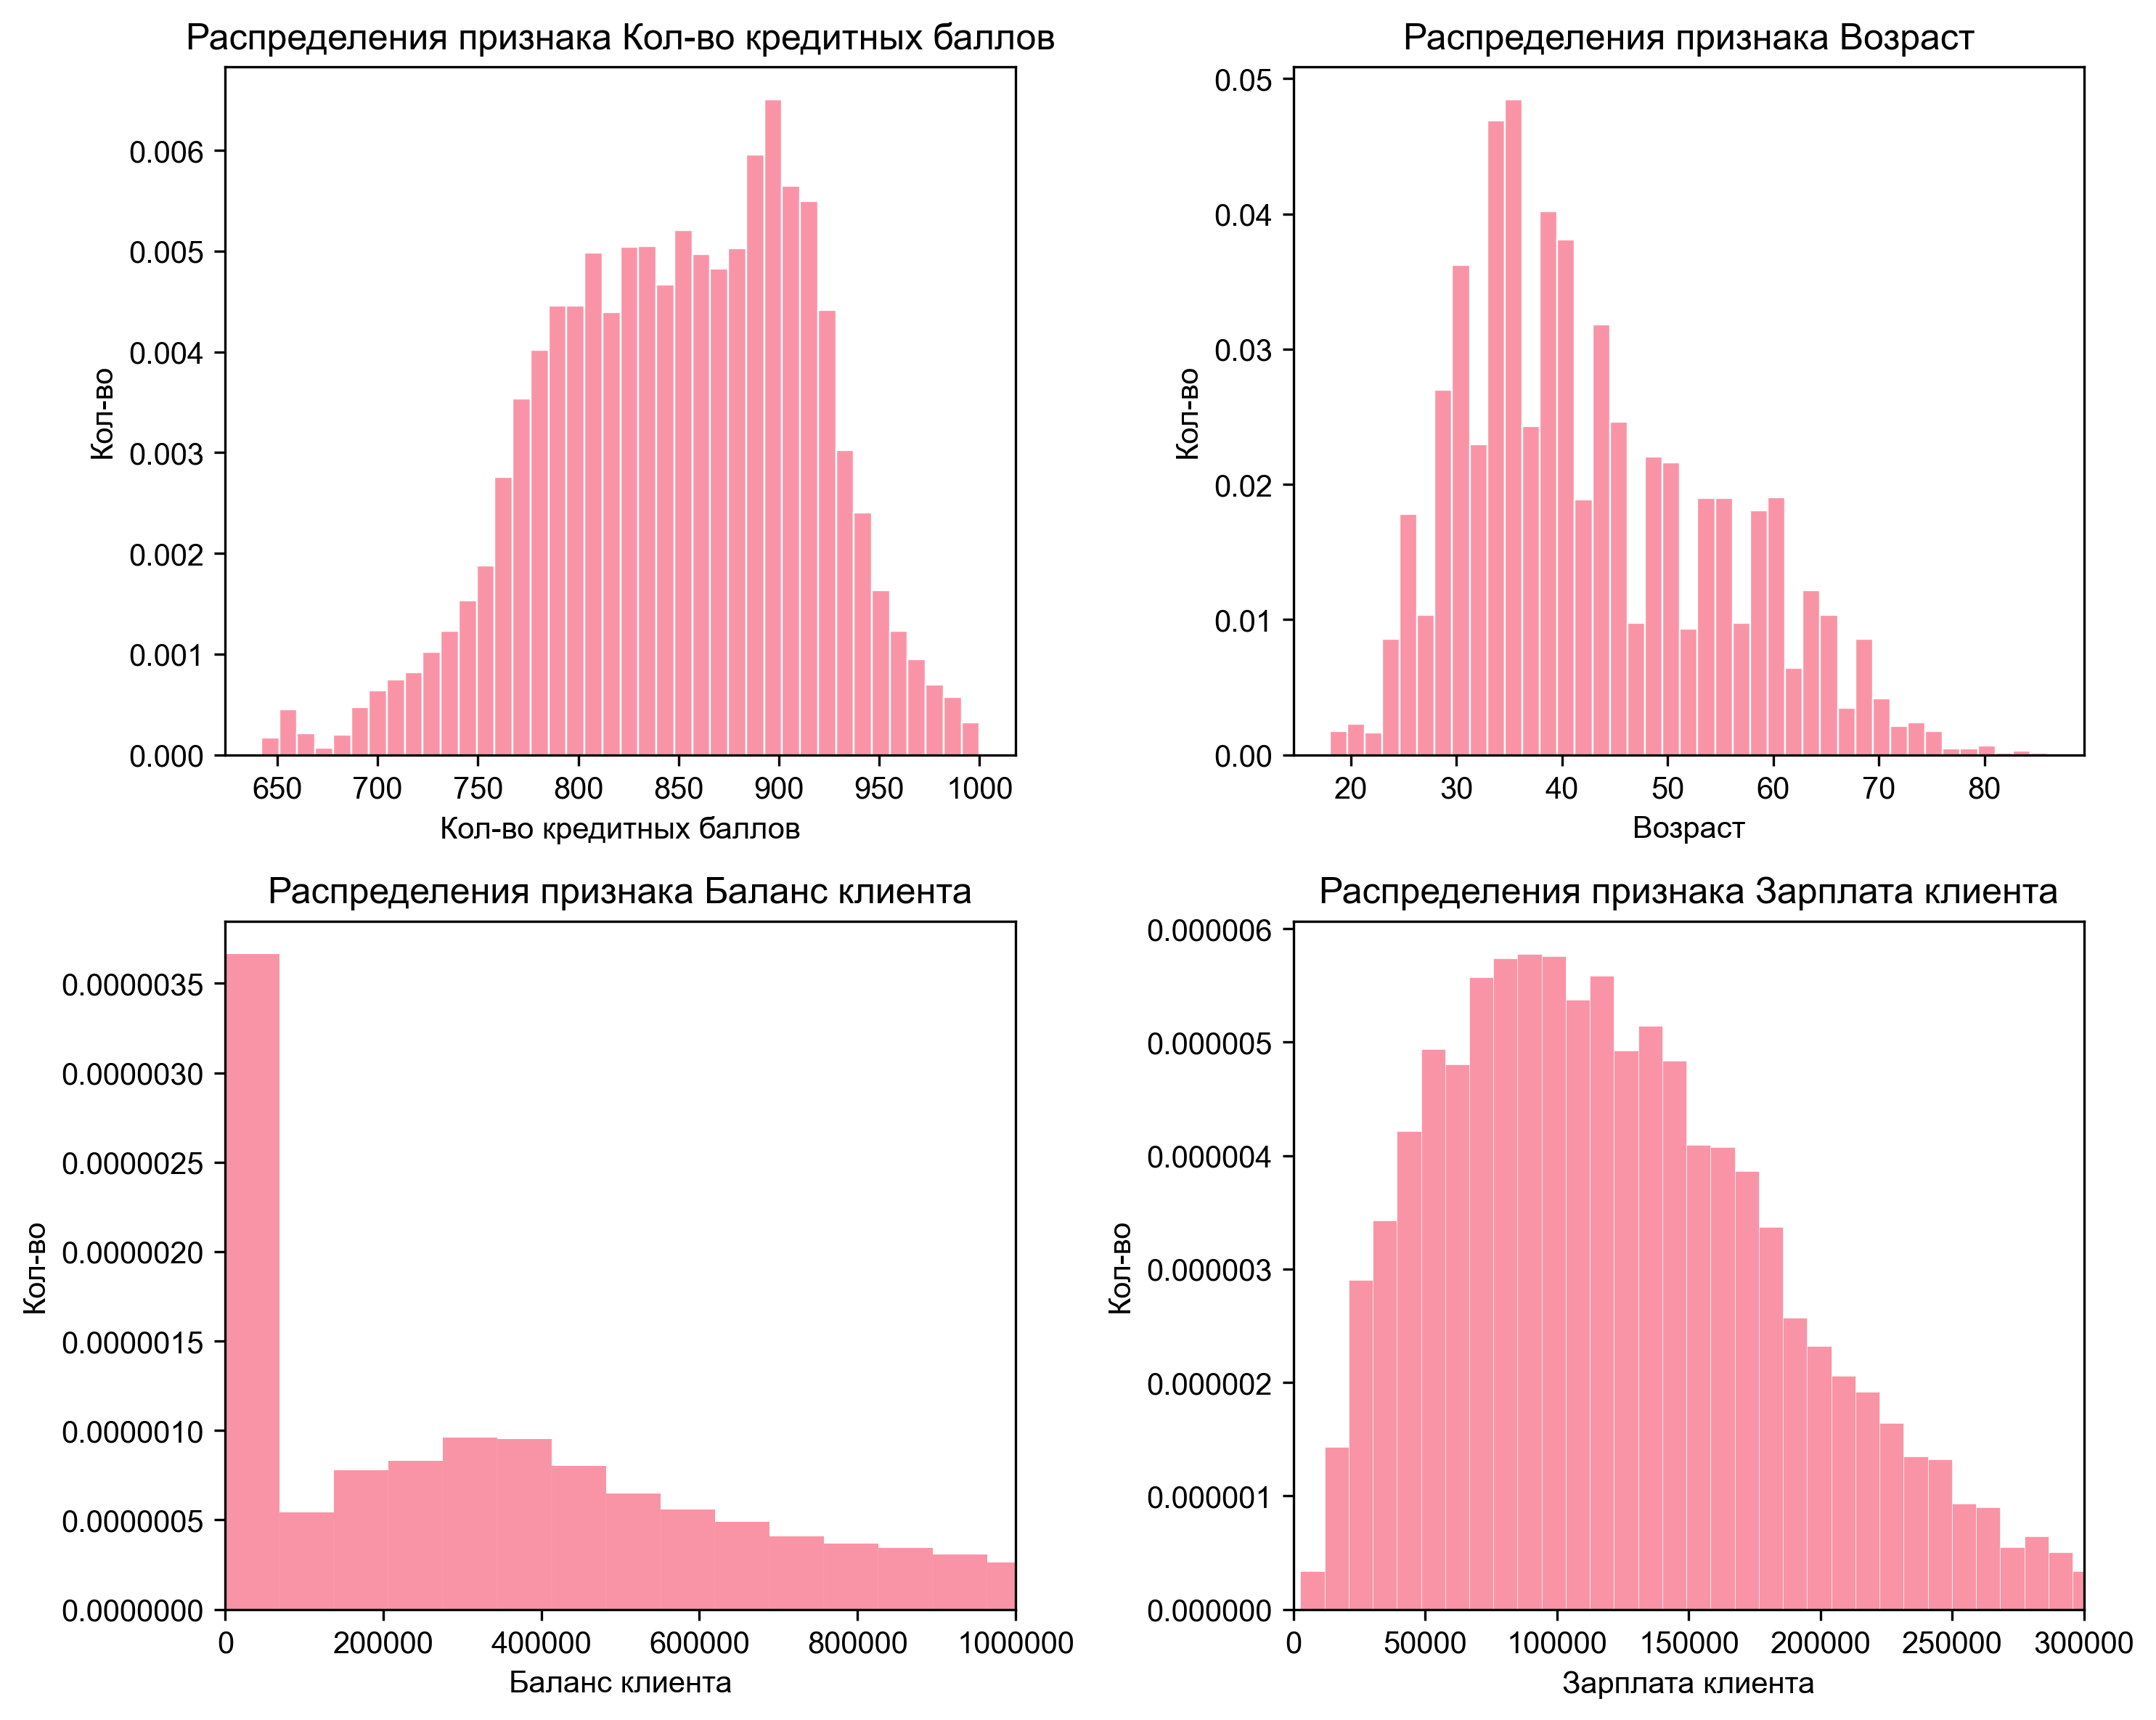

In [24]:
column_names = {
    'score': 'Кол-во кредитных баллов', 
    'age': 'Возраст', 
    'balance': 'Баланс клиента', 
    'est_salary': 'Зарплата клиента'
}

fig, axs = plt.subplots(len(column_names) // 2, 2, figsize=(10,8), dpi=300)

sns.set_style("darkgrid")

new_axs = [item for sublist in axs for item in sublist]

column_limits = {
    'score': None,
    'age': None, 
    'balance': (0, 1000000), 
    'est_salary': (0, 300000)
}

for i, column in enumerate(column_names):
    sns.histplot(data=customers, x=column, stat='density', common_norm=False, palette="Blues_d", ax=new_axs[i])
    new_axs[i].set_title('Распределения признака {}'.format(column_names[column]))
    new_axs[i].ticklabel_format(axis='both', style='plain', useOffset=False)
    new_axs[i].set_xlabel(format(column_names[column]))
    new_axs[i].set_ylabel('Кол-во')
    
    if column in column_limits:
        limit = column_limits[column]
        if limit is not None:
            new_axs[i].set_xlim(limit)
    
plt.tight_layout()
plt.show()

<b>Подитог:</b>
- распределение кредитных баллов и возраста выглядит как нормальное. Также наблюдаются выбросы по кредитным баллам в районе 900, а также по по возрасту 35-37 лет.
- по балансу наблюдаетс большое количество клиентов от 0 до 50-70 тысяч, это может быть связано с тем, что много пользователей либо уходят (стадия закрытия счета), либо не активны в использовании своих счетов.
- по заработной плате распредление кажется равномерным.

### Анализ корреляции
<a id='
Correlatio_aAnalysis'></a>
Текст введения. [Вернуться к началу](#Содержание)

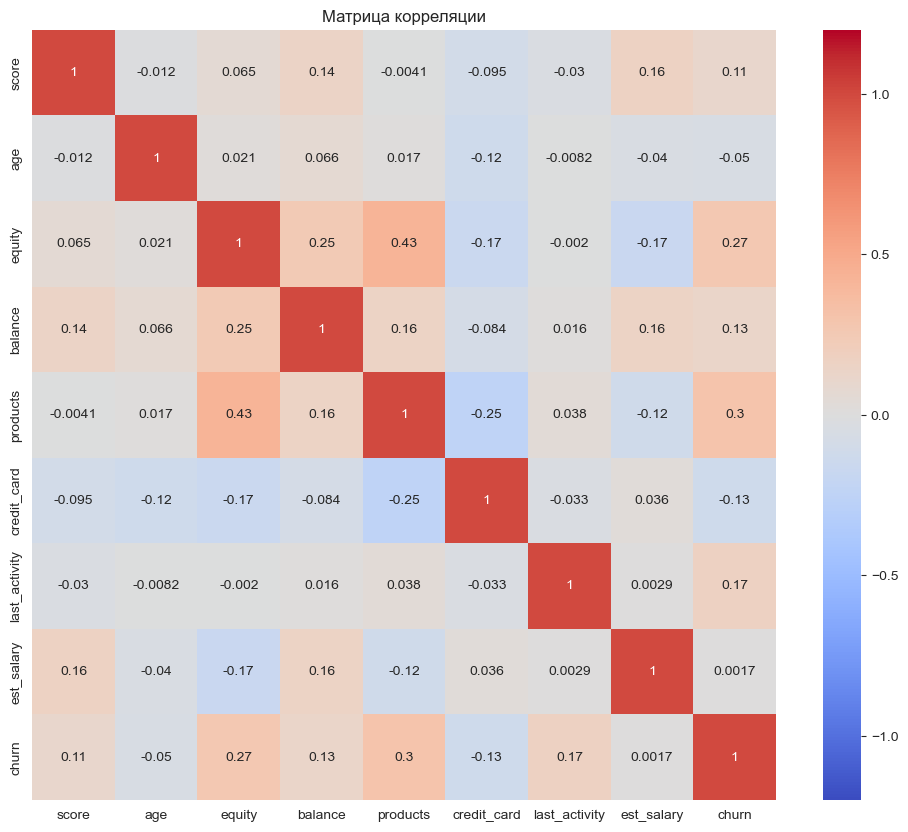

In [25]:
#построим матрицу корреляции
plt.figure(figsize=(12, 10))
sns.heatmap(customers.corr(), annot=True, cmap='coolwarm', vmin=-1.2, vmax=1.2)
plt.title('Матрица корреляции')
plt.show()

<b>Подитог:</b>

По данной тепловой карте мы наблюдаем картину, что все значения не превышают значения 0,3. Это может говорить о том, что какой-либо сильной зависимости  между предоставленными параметрами мы не наблюдаем. Но все же небольшие зависимости мы наблюдаем:
- наблюдается корреляция между количетсвом продуктов и количеством собственности - 0,43;
- отток может быть связан с количетсвом продуктов - 0,3;
- отток может быть также связан с количеством собственности - 0,27;
- наблюдается коррелляция между балансом и количеством собственности - 0,25.

### Портрет клиентов, склонных к оттоку
<a id='Client_profile'></a>
Текст введения. [Вернуться к началу](#Содержание)

Воссоздадим портрет клиентов, которые склоны к уходу из банка. Основным параметром, по которому мы будем делать портрет - это `churn`

In [26]:
#посмотрим средние значения в срезе оттока
churn_mean = customers.groupby('churn').mean()
churn_mean = churn_mean.reset_index()
churn_mean

,churn,score,age,equity,balance,products,credit_card,last_activity,est_salary
0,0,845.40,43.02,2.38,529346.81,1.76,0.71,0.48,147674.64
1,1,863.42,41.45,3.76,1126350.48,2.38,0.55,0.70,148289.70


<b>Подитог:</b>

По полученной таблице мы можем сделать следующие наблюдения в части клиентов, которые склоны к оттоку:
- возраст клиентов 41 год;
- у клиентов больше 2х оформленных продуктов;
- наличие кредитной карты не сказывается сильно на отток;
- активность пользователей также сказывается на уход клиентов.

Построим в разрезе параметра оттока категориальные параметры.

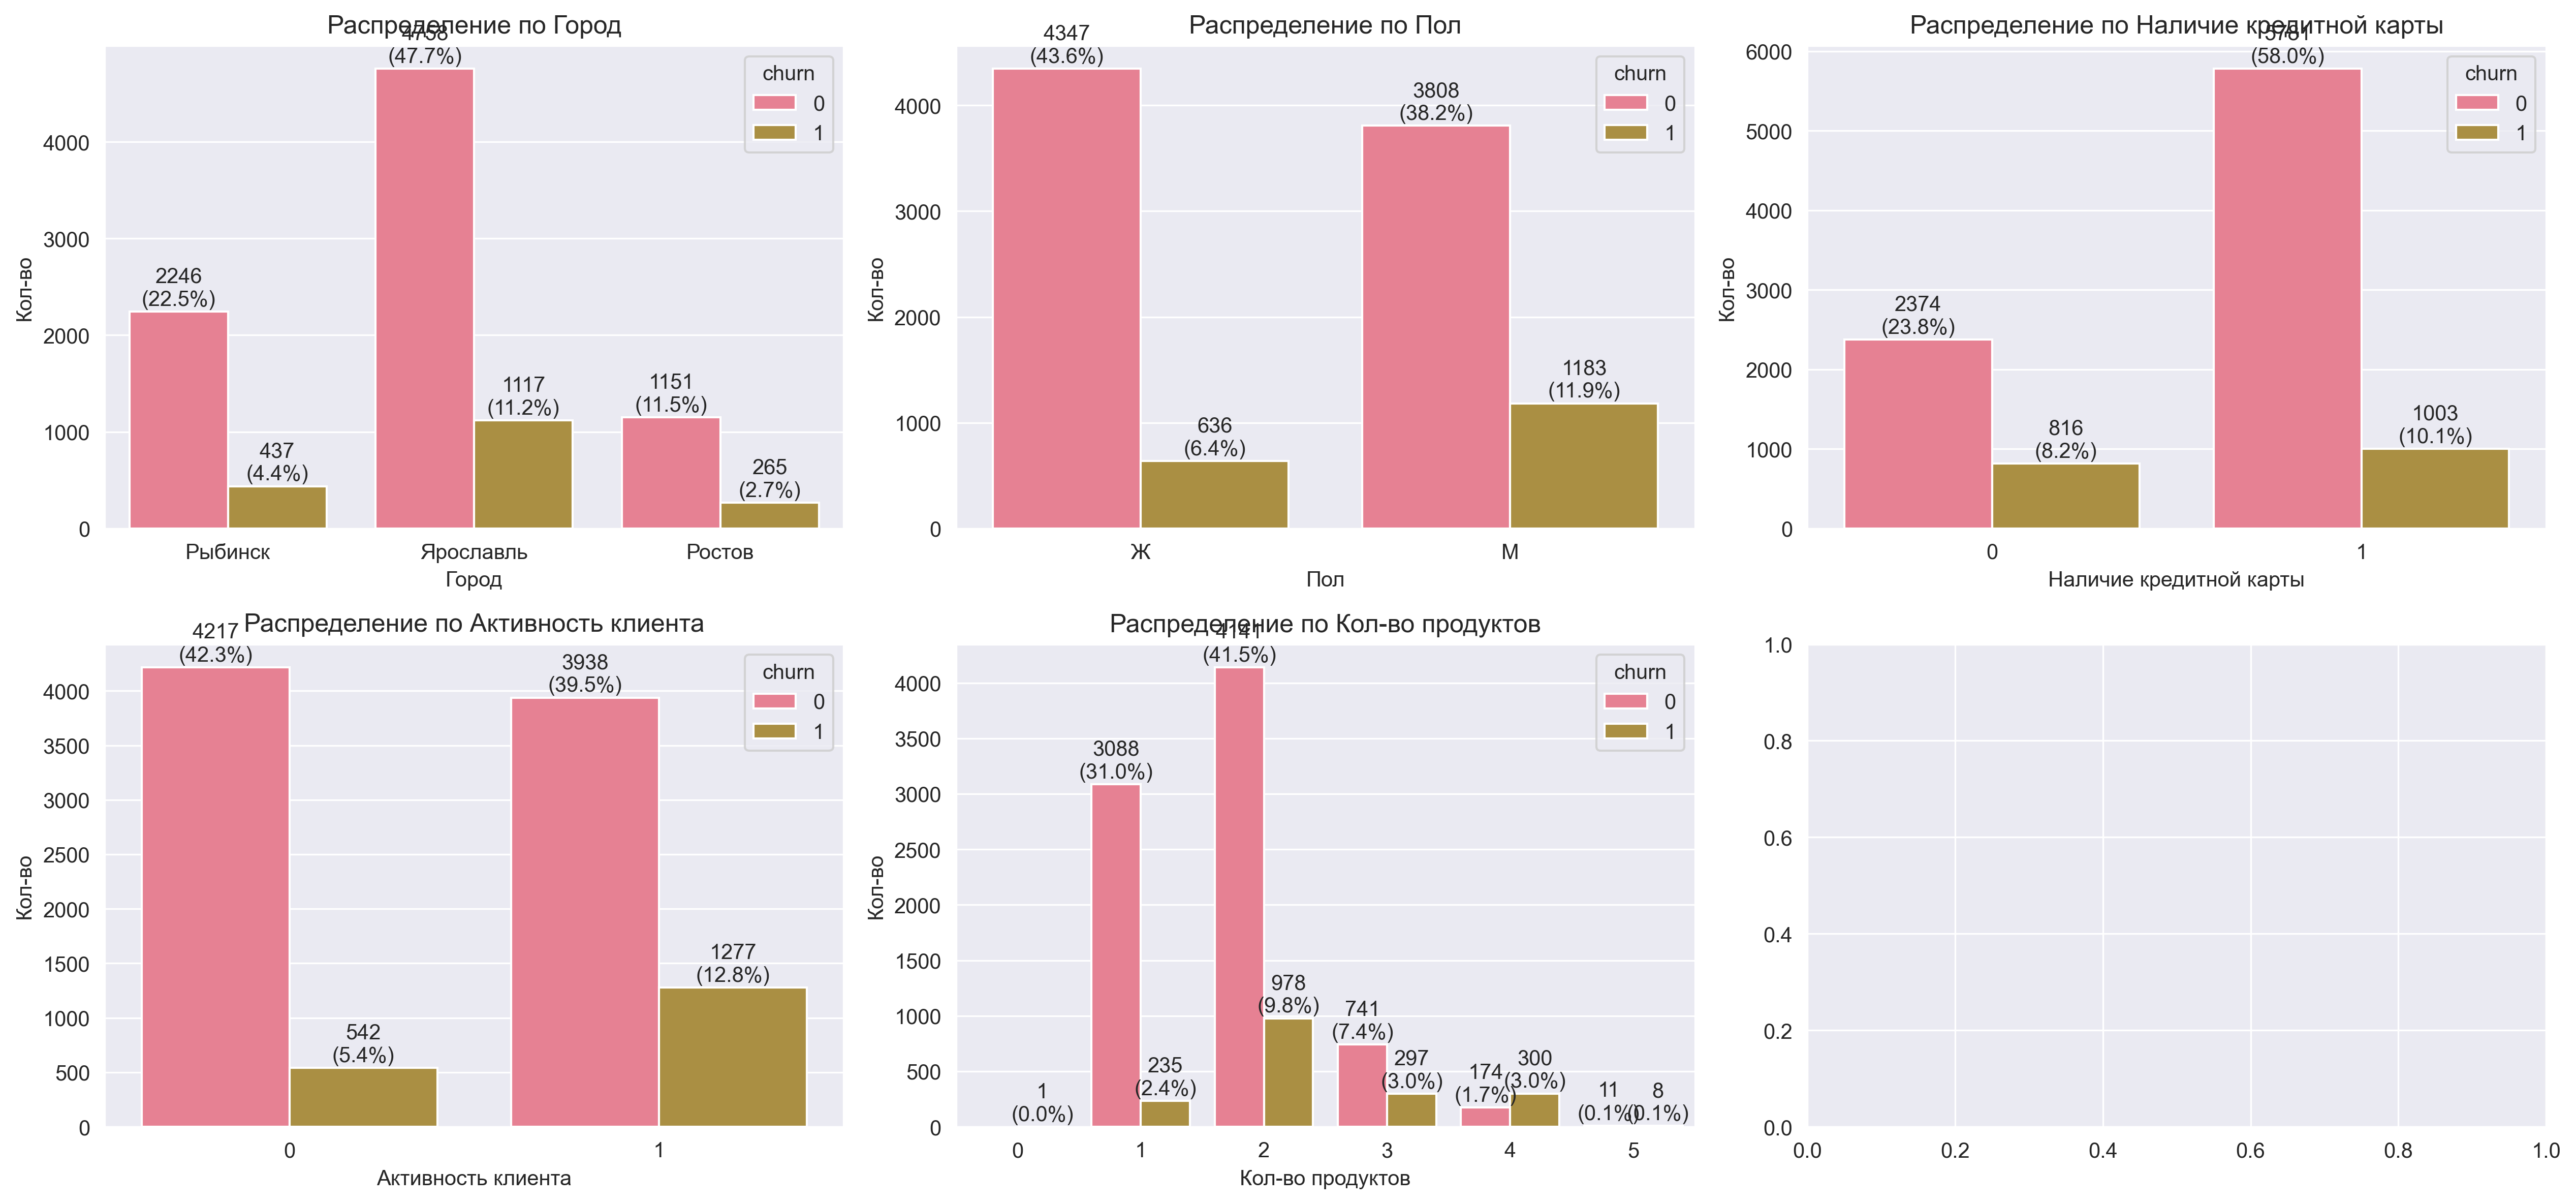

In [27]:
column_names = {
    'city': 'Город', 
    'gender': 'Пол', 
    'credit_card': 'Наличие кредитной карты', 
    'last_activity': 'Активность клиента',
    'products': 'Кол-во продуктов'
}

sns.set_palette("husl")
fig, ax = plt.subplots(2, 3, figsize=(17, 8), dpi=300)

for i, column in enumerate(column_names):
    row = i // 3
    col = i % 3
    sns.countplot(x=column, data=customers, hue='churn', ax=ax[row, col])
    ax[row, col].set_title("Распределение по {}".format(column_names[column]))
    ax[row, col].set_xlabel(column_names[column])
    ax[row, col].set_ylabel("Кол-во")
    
    for p in ax[row,col].patches:
        height = p.get_height()
        ax[row,col].annotate(f'{height:.0f}\n({height/customers[column].count():.1%})', 
                             xy=(p.get_x() + p.get_width() / 2, height),
                             xytext=(0, 1), textcoords='offset points', ha='center', va='bottom')

plt.tight_layout()
plt.show()

<b>Подитог:</b>

По полученным диаграммам можем зафиксировать следующее:
- в городе `Ярославль` наблюдается большая часть оттока клиентов - 11,2% (1117);
- среди клиентов, которые могут уйти, преобладают `мужчины` - 11,9% (1183);
- в отток в основном клиенты, которые `имеют кредитную карту` - 10,1% (1003);
- среди отточных клиентов преобладают те, которые `проявляют активность` - 12,8% (1277);
- по количеству продуктов в основном преобладают те, у которых `больше двух продукта`.

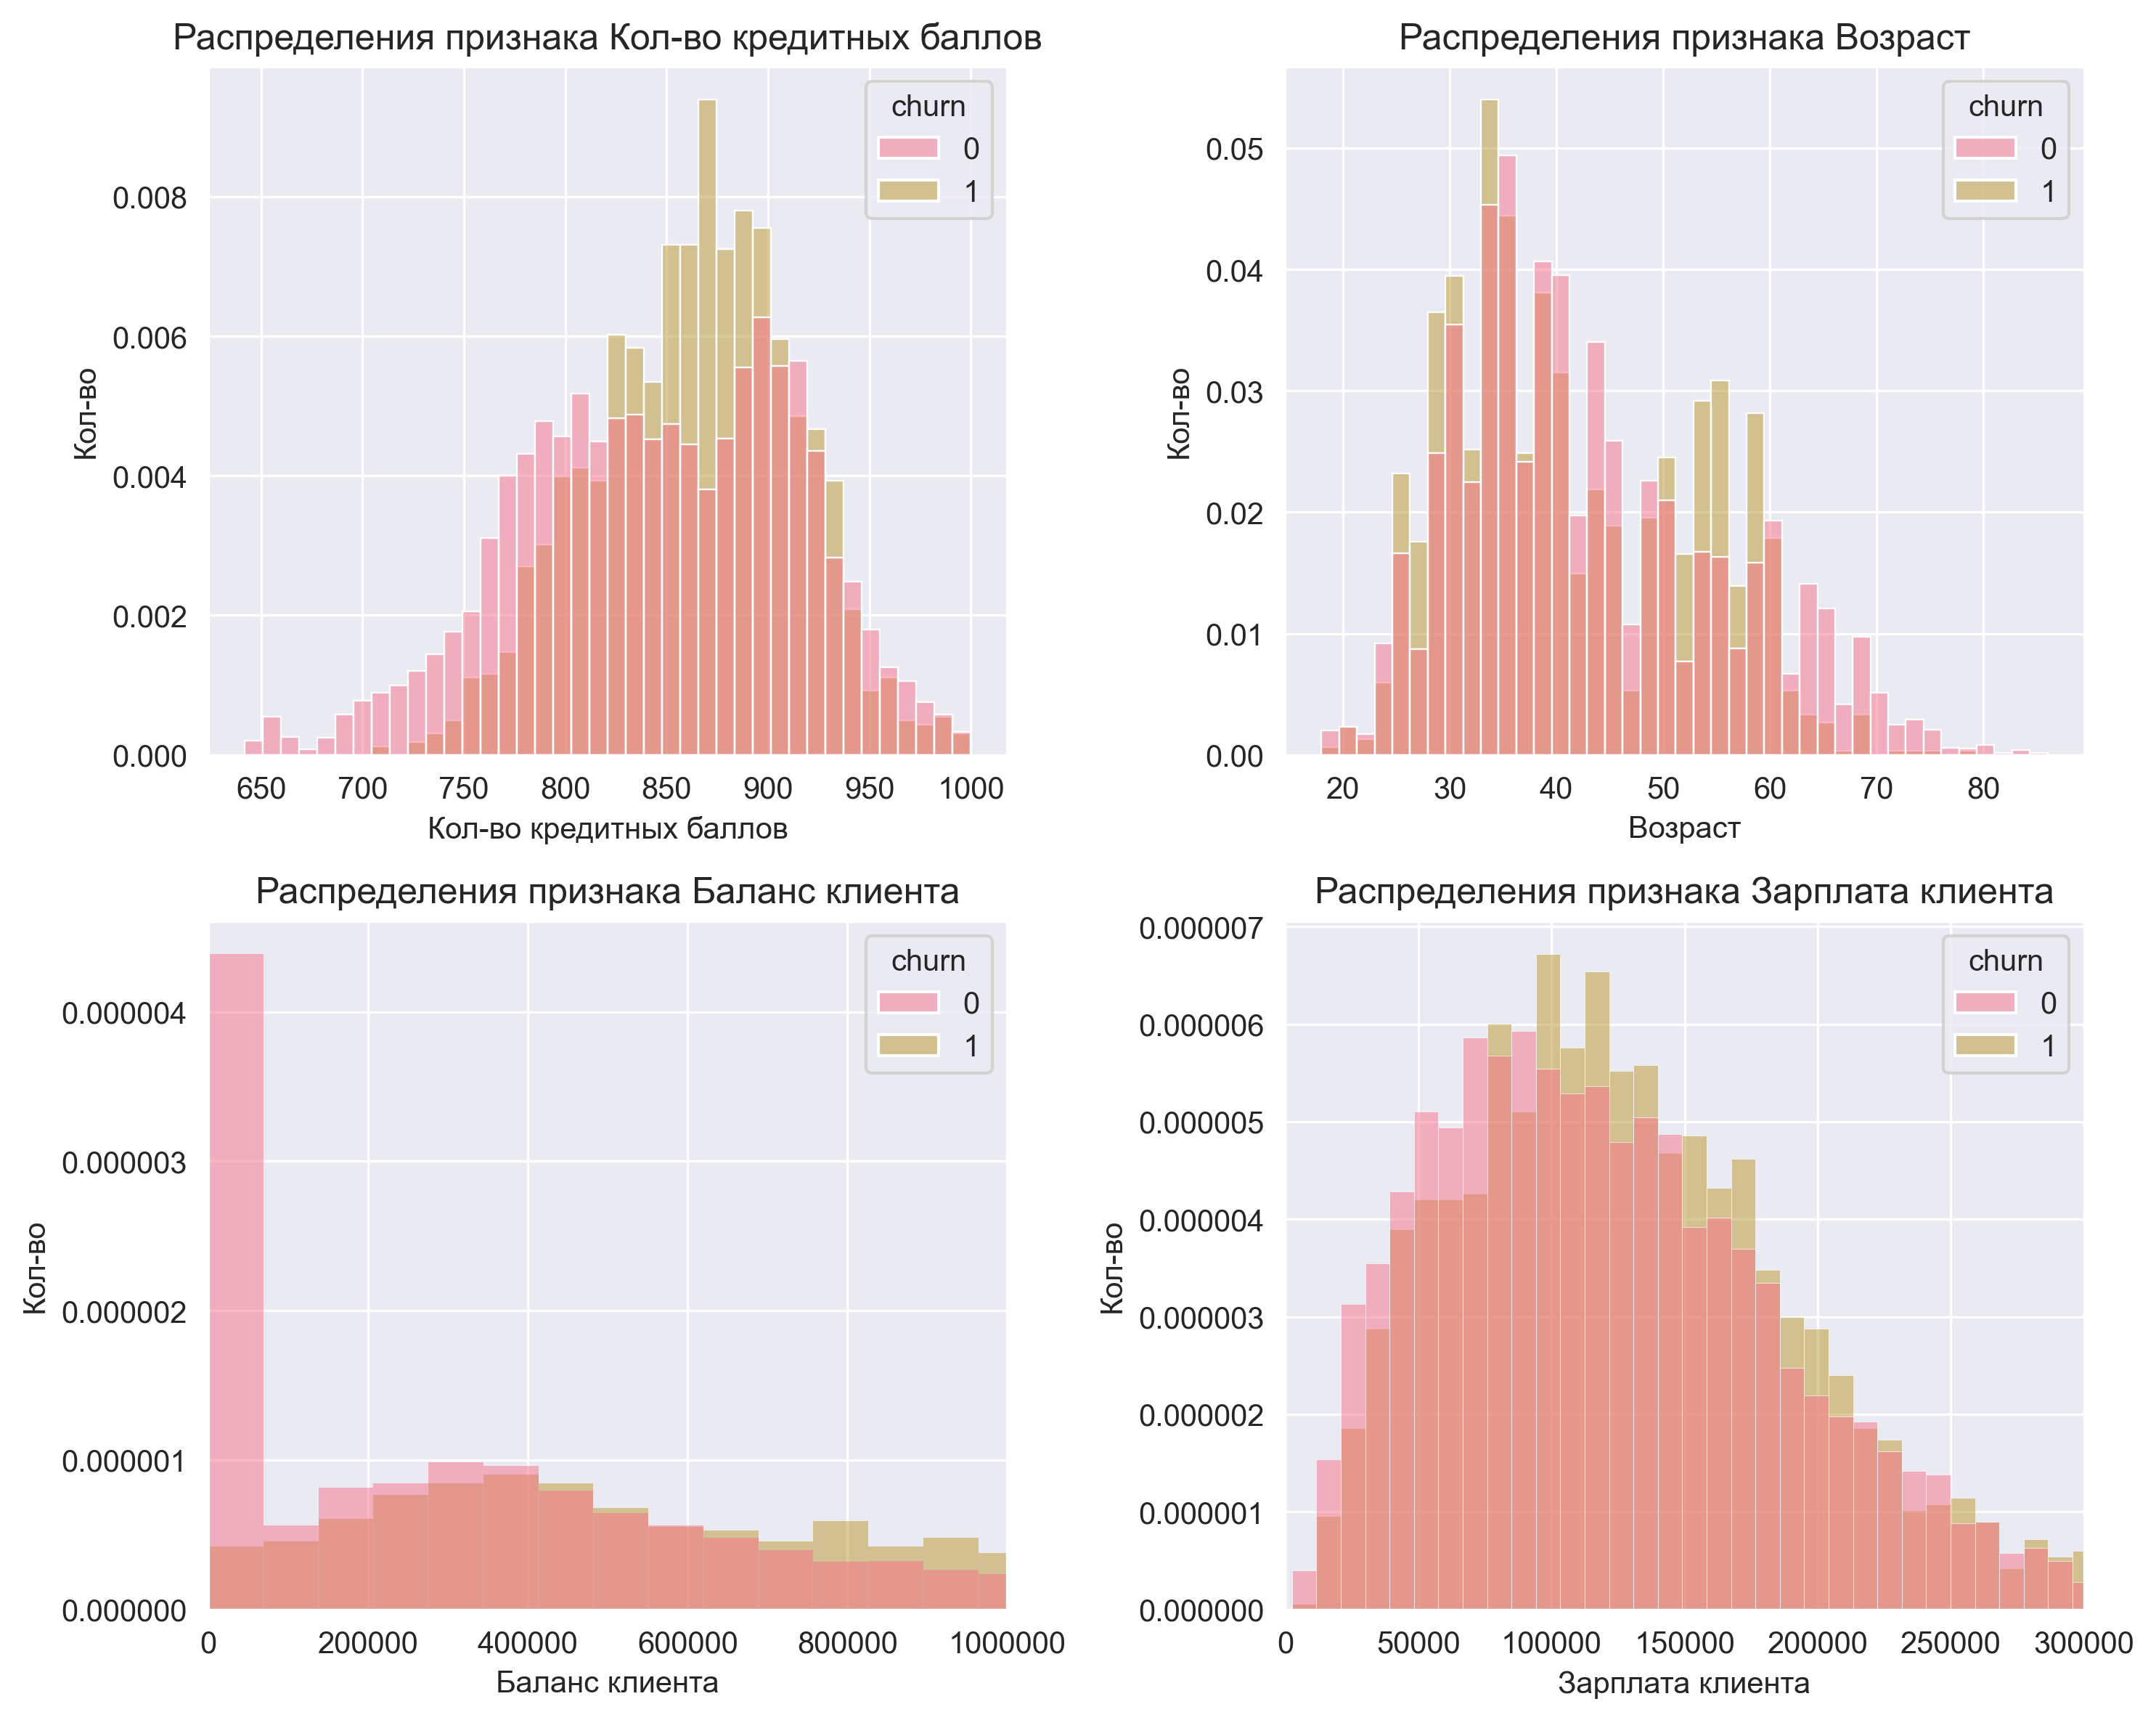

In [28]:
column_names = {
    'score': 'Кол-во кредитных баллов', 
    'age': 'Возраст', 
    'balance': 'Баланс клиента', 
    'est_salary': 'Зарплата клиента'
}

fig, axs = plt.subplots(len(column_names) // 2, 2, figsize=(10,8), dpi=300)

sns.set_style("darkgrid")

new_axs = [item for sublist in axs for item in sublist]

column_limits = {
    'score': None,
    'age': None, 
    'balance': (0, 1000000), 
    'est_salary': (0, 300000)
}

new_axs = [item for sublist in axs for item in sublist]

for i, column in enumerate(column_names):
    sns.histplot(data=customers, x=column,  stat='density', hue = 'churn', common_norm=False,  ax=new_axs[i])
    new_axs[i].set_title('Распределения признака {}'.format(column_names[column]))
    new_axs[i].ticklabel_format(axis='both', style='plain', useOffset=False)
    new_axs[i].set_xlabel(format(column_names[column]))
    new_axs[i].set_ylabel('Кол-во')
    
    if column in column_limits:
        limit = column_limits[column]
        if limit is not None:
            new_axs[i].set_xlim(limit)
    

plt.tight_layout()
plt.show();

<b>Подитог:</b>

По полученным диаграммам можем зафиксировать следующее:
- отток клиентов происходит, у которых кредитные баллы примерно в диапазоне от 830 до 900;
- склонны к оттоку в возрасте примерно от 25 до 33 и от 50 до 60;
- также отток происходит у клиентов с балансом свыше 400х тысяч;
- заработная плата у клиентов, которые уходят от 70 до 210 тысяч.

<b>Общий вывод по портрету клиентов.</b>

По исследовательскому анализу зафиксируем портрет клиента, который не склонен к оттоку:
- клиенты женского пола;
- от 39 до 48 лет;
- клиенты, оформившие продукты в банках Рыбинска;
- зарплата данных клиентов не выше 100 000.

Клиенты, которые склоны к оттоку:
- клиенты мужского пола;
- возраст от 25 до 33 и от 50 до 60;
- клиенты, оформившие продукты в банках Ярославля;
- зарплата данных клиентов от 100 000 до 210 000;
- баланс выше 400 000;
- у данных клиентов больше двух открытых продукта в банке.

## Шаг 3. Статический анализ
<a id='Static_analysis'></a>
Текст введения. [Вернуться к началу](#Содержание)

### Проверка гипотезы - "Различия дохода между теми клиентами, которые ушли и теми, которые остались"
<a id='Hypothesis_one'></a>
Текст введения. [Вернуться к началу](#Содержание)

In [29]:
#посмотрим распределение клиентов по колонке 'churn'
print('Количество ушедших клиентов: ', customers[customers['churn'] == 1].shape[0])
print('Количество оставшихся клиентов: ', customers[customers['churn'] == 0].shape[0])

Количество ушедших клиентов:  1819
Количество оставшихся клиентов:  8155


In [30]:
#сгруппируем таблицу для просмотра средних, медианных и стандартных значений по доходам
group_est_salary = customers.groupby('churn')['est_salary'].agg(['mean', 'median', 'std'])
group_est_salary = group_est_salary.reset_index()
group_est_salary

,churn,mean,median,std
0,0,147674.64,118227.60,142684.41
1,1,148289.70,125395.22,122932.16


Средние, медианные и стандартные значения имеют небольшие различия, по этому предлагаю проверку гипотезу выполнять посредством `ttest`.

Определим нулевую и альтернативную гипотезы:
- `H0` - Средний доход между теми клиентами, которые ушли и темы, которые остались, равен
- `H1` - Средний доход между теми клиентами, которые ушли и темы, которые остались, различен

In [31]:
# подготовка выборок по отточным и неотточным клиентам
churned = customers[customers["churn"] == 1]["est_salary"]
not_churned = customers[customers["churn"] == 0]["est_salary"]

# проведение t-теста
stat, pvalue = stats.ttest_ind(churned, not_churned, equal_var=False)
alpha = 0.05 # уровень значимости

print("t-статистика:", stat)
print("p-значение:", pvalue)

if pvalue < alpha:
    print("Отвергаем нулевую гипотезу. Средний доход между теми клиентами, которые ушли и темы, которые остались, различен.")
else:
    print("Не отвергаем нулевую гипотезу. Средний доход между теми клиентами, которые ушли и темы, которые остались, равен.")

t-статистика: 0.1871189575481135
p-значение: 0.8515799588935961
Не отвергаем нулевую гипотезу. Средний доход между теми клиентами, которые ушли и темы, которые остались, равен.


### Проверка гипотезы "Различия возраста между теми клиентами, которые ушли и темы, которые остались"
<a id='Hypothesis_two'></a>
Текст введения. [Вернуться к началу](#Содержание)

In [32]:
#сгруппируем таблицу для просмотра средних, медианных и стандартных значений по доходам
group_age = customers.groupby('churn')['age'].agg(['mean', 'median', 'std'])
group_age = group_age.reset_index()
group_age

,churn,mean,median,std
0,0,43.02,40.00,12.38
1,1,41.45,39.00,11.18


Также как и с доходом клиентов мы наблюдаем, что средние, медианные и стандартные значения имеют небольшие различия, по этому предлагаю проверку гипотезу выполнять посредством `ttest`.

Определим нулевую и альтернативную гипотезы:
- `H0` - Средний возраст между теми клиентами, которые ушли и темы, которые остались, равен
- `H1` - Средний возраст между теми клиентами, которые ушли и темы, которые остались, различен

In [33]:
# подготовка выборок по отточным и неотточным клиентам
churned = customers[customers["churn"] == 1]["age"]
not_churned = customers[customers["churn"] == 0]["age"]

# проведение t-теста
stat, pvalue = stats.ttest_ind(churned, not_churned, equal_var=False)
alpha = 0.05 # уровень значимости

print("t-статистика:", stat)
print("p-значение:", pvalue)

if pvalue < alpha:
    print("Отвергаем нулевую гипотезу. Средний возраст между теми клиентами, которые ушли и темы, которые остались, различен.")
else:
    print("Не отвергаем нулевую гипотезу. Средний возраст между теми клиентами, которые ушли и темы, которые остались, равен.")

t-статистика: -5.311087913536906
p-значение: 1.1721656853879547e-07
Отвергаем нулевую гипотезу. Средний возраст между теми клиентами, которые ушли и темы, которые остались, различен.


<b>Итог:</b>

Мы провели статический анализ двух гипотез:
- Различия дохода между теми клиентами, которые ушли и теми, которые остались;
- Различия возраста между теми клиентами, которые ушли и темы, которые остались.

По результатам статического анализа мы получили следующие результаты:
- Средний доход между клиентами, которые ушли и теми, которые остались, равен;
- Средний возраст между теми клиентами, которые ушли и теми, которые остались, различен.

## Шаг 4. Построение сегментов и извлечение признаков оттоков
<a id='Segmentation_calculation'></a>
Текст введения. [Вернуться к началу](#Содержание)

По портрету, который мы составили для клиентов, которые склоны к оттоку, выделим основные опасные параметры:
- возраст (колонка `age`) - в большей части две группы от 25 до 33 и от 50 до 60;
- пол (колонка `gender`) - мужской пол;
- город (колонка `city`) - рассматриваем филиалы Ярославля;
- зарплата (колонка `est_salary`) - группа от 100 до 210 тысяч;
- количество продуктов (колонка `products`) - группа с двумя продуктами.

In [34]:
#напишем функцию для расчета долей по опасным параметрам
def percent_customers(customers, column, condition):
    count = customers.query(f"{column} {condition}").shape[0]
    percent = round(count / customers.shape[0] * 100, 2)
    result_string = f"{column} {condition}: {percent}%"
    return result_string

In [35]:
#вычислим процент клиентов между 25 и 33 лет
condition = "> 25 and age < 33"
print(percent_customers(customers, 'age', condition))

age > 25 and age < 33: 17.56%


In [36]:
#вычислим процент клиентов между 50 и 60 лет
condition = "> 50 and age < 60"
print(percent_customers(customers, 'age', condition))

age > 50 and age < 60: 14.14%


In [37]:
#вычислим процент мужчин в датафрейме
percent_customers(customers, 'gender', "== 'М'")

"gender == 'М': 50.04%"

In [38]:
#вычислим процент клиентов из Ярославля в датафрейме
percent_customers(customers, 'city', "== 'Ярославль'")

"city == 'Ярославль': 58.9%"

In [39]:
#вычислим процент клиентов с заработной платы между 100 и 210 тысяч
condition = "> 100000 and age < 210000"
print(percent_customers(customers, 'est_salary', condition))

est_salary > 100000 and age < 210000: 60.65%


In [40]:
#вычислим процент клиентов с кол-вом продуктов 2 в датафрейме
percent_customers(customers, 'products', "== 2")

'products == 2: 51.32%'

,name,size,avg_churn
0,Мужчины,4991,0.24
1,Возраст 25-33,1751,0.23
2,Возраст 50-60,1410,0.28
3,Ярославль,5875,0.19
4,Баланс,4781,0.28
5,Больше 2х продуктов,1531,0.40


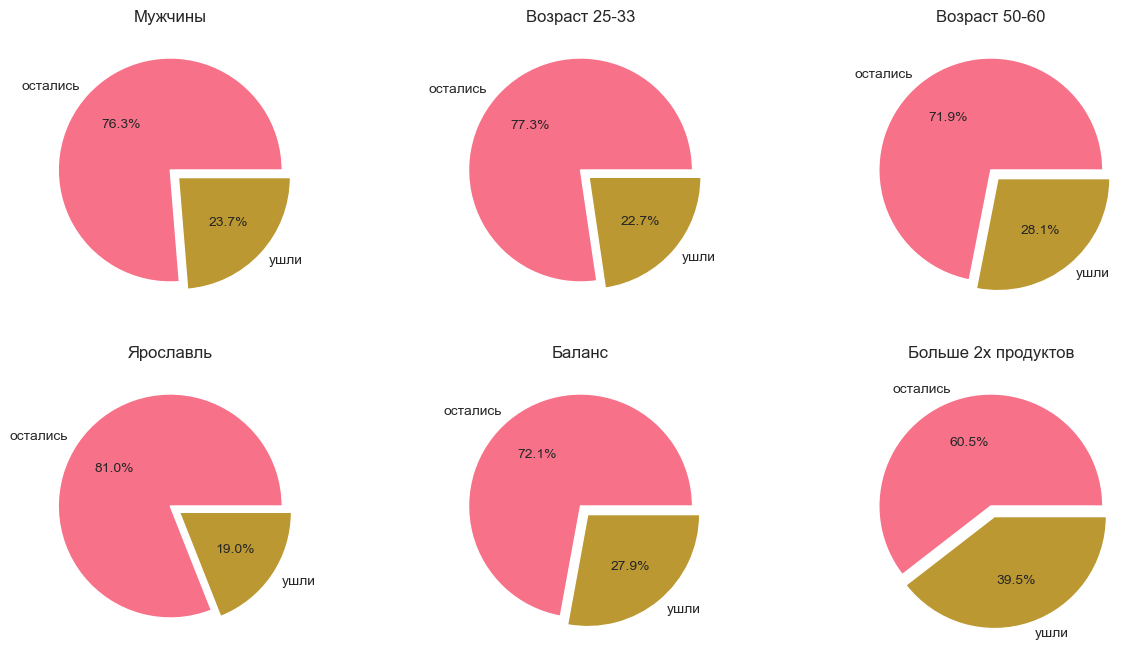

In [41]:
# Список условий для подвыборок
conditions_list = [
    {"name": "Мужчины", "condition": "gender == 'М'"},
    {"name": "Возраст 25-33", "condition": "25 < age < 33"},
    {"name": "Возраст 50-60", "condition": "50 < age < 60"},
    {"name": "Ярославль", "condition": "city == 'Ярославль'"},
    {"name": "Баланс", "condition": "balance > 400000"},
    {"name": "Больше 2х продуктов", "condition": "products > 2"}
    #{"name": "Зарплата", "condition": "100000 < est_salary < 210000"}
    #{"name": "Активность", "condition": "last_activity == True"},
    #{"name": "Кредитная карта", "condition": "credit_card == True"}
]

# Вычисление долей оттока и вывод диаграмм для каждого сегмента
customers_segment = pd.DataFrame(columns=['name', 'size', 'avg_churn'])
fig, axs = plt.subplots(2, 3, sharey=False, figsize=(15, 8))

for i, condition in enumerate(conditions_list):
    # Вычисление долей оттока и создание диаграммы
    j = i // 3  # Определяем строку
    k = i % 3  # Определяем столбец
    value = customers.query(condition['condition'])
    churn_count = value.query("churn==1")['age'].count()
    if churn_count == 0:
        axs[j,k].pie([1], labels=['постоянные'], autopct='%1.1f%%')
        avg_churn = 0
    else:
        # Добавление параметра explode для выделения сегмента "ушедших"
        explode = [0, 0.1]
        churn_share = value['churn'].sum() / len(value)
        axs[j,k].pie([1-churn_share, churn_share], labels=['остались', 'ушли'], autopct='%1.1f%%', explode=explode)
        avg_churn = churn_count / len(value)

    # Заполнение информации о текущем сегменте в таблицу
    customers_segment.loc[i] = [condition['name'], len(value), avg_churn]

    # Настройка внешнего вида графика
    axs[j,k].set(title=condition['name'])

# Вывод таблицы
display(customers_segment)

Схожи по оттоку Баланс и Группа возрастная между 50 и 60 годами, Мужчины и Возрастная группа от 25 до 33, а также у клиентов открыто больше 2х продуктов в банке. Объединим данные условия и посмотрим на отток.

,name,size,avg_churn
0,Больше 2х продуктов,1531,0.40
1,Баланс > 400000 и Возраст 50-60,797,0.39
2,Мужчины в Возрасте от 25 до 33,1016,0.27


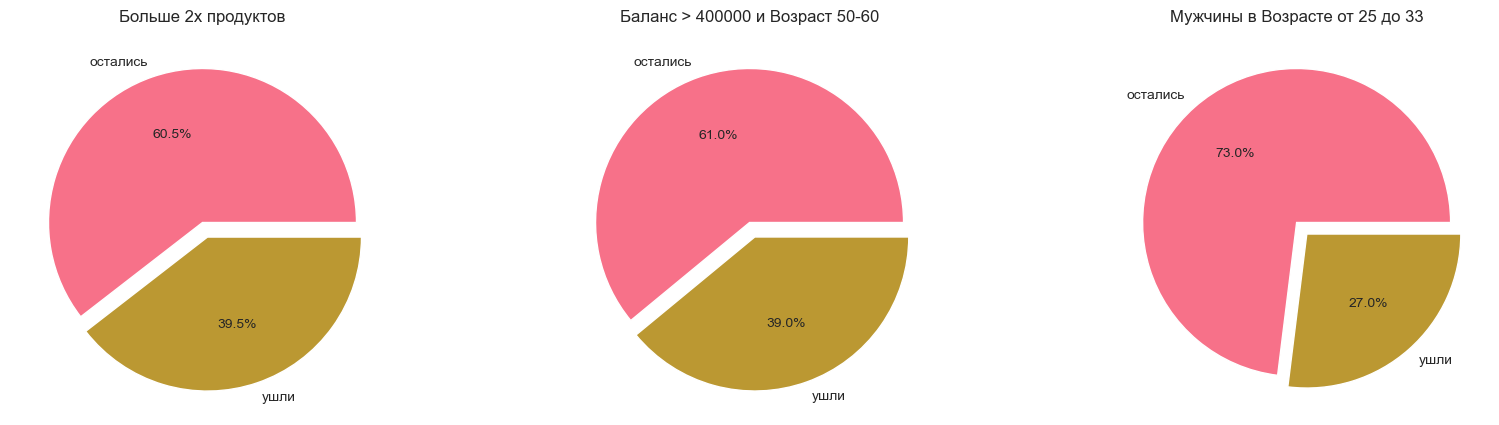

In [42]:
# Список условий для подвыборок
conditions_list = [
    {"name": "Больше 2х продуктов", "condition": "products > 2"},
    {"name": "Баланс > 400000 и Возраст 50-60", "condition": "(balance > 400000) & (50 < age < 60)"},
    {"name": "Мужчины в Возрасте от 25 до 33", "condition": "(gender == 'М') & (25 < age < 33)"},
]

# Вычисление долей оттока и вывод диаграмм для каждого сегмента
customers_segment = pd.DataFrame(columns=['name', 'size', 'avg_churn'])
fig, axs = plt.subplots(1, len(conditions_list), sharey=False, figsize=(20, 5))

for i, condition in enumerate(conditions_list):
    # Объединение условий
    name = condition['name']
    value = customers.query(condition['condition'])

    # Вычисление долей оттока и создание диаграммы
    churn_count = value.query("churn==1")['age'].count()
    if churn_count == 0:
        axs[i].pie([1], labels=['постоянные'], autopct='%1.1f%%')
        avg_churn = 0
    else:
        # Добавление параметра explode для выделения сегмента "ушедших"
        explode = [0, 0.1]
        churn_share = value['churn'].sum() / len(value)
        axs[i].pie([1-churn_share, churn_share], labels=['остались', 'ушли'], autopct='%1.1f%%', explode=explode)
        avg_churn = churn_count / len(value)

    # Заполнение информации о текущем сегменте в таблицу
    customers_segment.loc[i] = [name, len(value), avg_churn]

    # Настройка внешнего вида графика
    axs[i].set(title=name)

# Вывод таблицы
display(customers_segment)

<b>Подитог:</b>

- клиенты, которые оформли в банке больше 2х продуктов;
- самые отточные клиенты сегмента клиентов в возрасте от 50 до 60 лет с балансом больще 400 000;
- клиенты мужского пола, которые попадают в возрастную группу от 25 до 33 лет.

## Шаг 5. Выводы и рекомендации по исследованию
<a id='Total'></a>
Текст введения. [Вернуться к началу](#Содержание)

<b>Просмотреть презентацию можно по ссылке</b> - https://disk.yandex.ru/d/Uirk__hpnZFSOw

По завершению предлагаю зафискировать следующую информацию.

<b>ЦЕЛЬ.</b> Нам необходимо было провести анализ и максимально эффективно выделить сегменты отточных клиентов, чтобы они были однородными, высокоотточными и покрывали максимум проблемных зон банка. Таким образом, маркетинговое воздействие на эти сегменты должно привести к уменьшению.

<b>ОСНОВНЫЕ ВЫВОДЫ.</b>

- Исследовательский анализ:
    - Наибольшее колиечство клиентов являются клиентами в городе Ярославль (5875 клиентов);
    - По полу сильных различий нет между клиентами - Женщин (4953), Мужчин (4991);
    - Среди предоставленных данных клиентов с кредитными картами в <b>два раза</b> больше - 6784 клиента;
    - Активных клиентов больше, чем бездействующих - 5215 клиентов;
    - Наибольшее количество клиентов с двумя продуктами - 5119 клиентов, очень близку к значению к клиентам с кредитными картами, то есть можно предположить что у клиента в банке открыта дебетовый и кредитный счета;
    - Из представленных данных уходящих / ушедших пользователей составляет 1819 клиентов - показатель очень большой.
    
- Далее мы определили портреты пользователей, склоны к оттоку больше и кто более лоялен и готов остаться в банке.
    - Лоялные клиенты:
        - клиенты женского пола;
        - от 39 до 48 лет;
        - клиенты, оформившие продукты в банках Рыбинска;
        - зарплата данных клиентов не выше 100 000.
    - Отточные клиенты:
        - клиенты мужского пола;
        - возраст от 25 до 33 и от 50 до 60;
        - клиенты, оформившие продукты в банках Ярославля;
        - зарплата данных клиентов от 100 000 до 210 000;
        - баланс выше 400 000;
        - у данных клиентов больше двух открытых продукта в банке.
        
- После чего мы провели статический анализ гипотез, в результате которого мы выяснили:
    - Средний доход между клиентами, которые ушли и теми, которые остались, равен;
    - Средний возраст между теми клиентами, которые ушли и теми, которые остались, различен.

- В завершении мы провели сегментацию, на основе которой можно сформировать следующие <b>рекомендации</b>:
    - самые отточные клиенты сегмента клиентов в возрасте от 50 до 60 лет с балансом больще 400 000:
        - данные оттоки могут быть связаны с тем, что клиенты данного возраста могут перестраховываться в части сохранения своих сбережений. По итогу можно предложить данным клиентам Вклады под хороший процент. 
    - клиенты, которые оформли в банке больше 2х продуктов;
        - предлагаю для клиентов данного сегмента предложить заменить такое большое количество продуктов заменить на более меньшее количество с наиболее выгодными предложениями.
    - клиенты мужского пола, которые попадают в возрастную группу от 25 до 33 лет.
        - необходимо изучить что именно неустраивает клиентов мужского пола в данном возрасте, выявить потребности данных клиентов - например, занятие спортом, шоппинг, автосервисы, и предложить наиболее выгодный продукт, например, дебетовую карту с повышенным кэшбеком по интересующим направлениям.